# **New York EV Chargins Station - Charging Session Analysis**

When we are away from home, there are thousands of charging stations that you can take advantage of across New York State. This level of charging is known as Level 2 and it is at least two times faster than Level 1.

Level 2 charging stations are mainly installed at stores, office buildings, municipal parking lots, parks, hotels, theaters and hospitals. All Level 2 charging stations have a common plug that all electric cars can use, while DC fast chargers may not be compatible with every model.

DC fast charging uses direct current (DC), as opposed to households which use alternating current (AC), and can provide close to a full charge in under an hour. Only public sites can support DC fast charging and they are most often installed along major travel corridors to support long distance drivers.

Currently, there are 6471 Level 2 Charging ports and 729 DC Fast Charging ports available in New York. Most of the Level 2 ports are owned by ChargePoint and Tesla owns most of the DC Fast Charging stations.


In [1]:
#Importing libraries needed for EDA

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

#### **NY EV Charging Sessions Dataset**

**Description:** New York State EV Charging Session details such as charging levels, duration, connectors.  
**Size:** 30 MB  
**Source:** nyserda.ny.gov  
**Format:** Excel (xlsx) 
**Access Method:** Downloaded from [nyserda.ny.gov](https://www.nyserda.ny.gov/-/media/Files/Publications/Research/Transportation/EValuateNY-ZIP-File.zip?la=en)

#### **NY EV Charging Sessions - Energy Usage**

In [2]:
#Reading the Excel spreadsheet and loading into pandas dataframe.
charge_sesssion = pd.read_excel('assets/EValuateNY-ZIP-File/resources.xlsx', 'Charging Use',usecols='A:I')

In [3]:
charge_sesssion.head()

,Start Date,ZIP Code,Network,Charging Time (hours),Total Duration (hours),Energy (kWh),Charging Sessions,Active Station Count,Active Port Count
0,2019-03-01,10468,EV Connect,8,9,127.348,6,3,3
1,2019-02-01,10468,EV Connect,2,20,1135.876,45,3,3
2,2019-03-01,11520,EV Connect,0,22,100.271,9,2,2
3,2019-01-01,10468,EV Connect,6,17,1580.828,54,3,3
4,2019-02-01,11520,EV Connect,11,0,425.306,45,2,2


In [4]:
charge_sesssion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6857 entries, 0 to 6856
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Start Date              6857 non-null   datetime64[ns]
 1   ZIP Code                6857 non-null   int64         
 2   Network                 6857 non-null   object        
 3   Charging Time (hours)   6857 non-null   int64         
 4   Total Duration (hours)  6857 non-null   int64         
 5   Energy (kWh)            6857 non-null   float64       
 6   Charging Sessions       6857 non-null   int64         
 7   Active Station Count    6857 non-null   int64         
 8   Active Port Count       6857 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 482.3+ KB


In [5]:
#Creating the Quarter column from the Charge Session start date
charge_sesssion['quarter'] = pd.PeriodIndex(charge_sesssion["Start Date"], freq='Q')

In [6]:
charge_sesssion.head()

,Start Date,ZIP Code,Network,Charging Time (hours),Total Duration (hours),Energy (kWh),Charging Sessions,Active Station Count,Active Port Count,quarter
0,2019-03-01,10468,EV Connect,8,9,127.348,6,3,3,2019Q1
1,2019-02-01,10468,EV Connect,2,20,1135.876,45,3,3,2019Q1
2,2019-03-01,11520,EV Connect,0,22,100.271,9,2,2,2019Q1
3,2019-01-01,10468,EV Connect,6,17,1580.828,54,3,3,2019Q1
4,2019-02-01,11520,EV Connect,11,0,425.306,45,2,2,2019Q1


In [7]:
#Making a copy of dataframe
charge_sesssion_duration = charge_sesssion

In [8]:
charge_sesssion_duration.columns

Index(['Start Date', 'ZIP Code', 'Network', 'Charging Time (hours)',
       'Total Duration (hours)', 'Energy (kWh)', 'Charging Sessions',
       'Active Station Count', 'Active Port Count', 'quarter'],
      dtype='object')

In [9]:
#Calculating the Average Energy grouping by quarter
charge_sesssion['Avg_Energy'] = charge_sesssion.groupby(['quarter'])['Energy (kWh)'].transform('mean')

In [10]:
#Calculating the Median Energy grouping by quarter
charge_sesssion['Median_Energy'] = charge_sesssion.groupby(['quarter'])['Energy (kWh)'].transform('median')

In [11]:
#Renaming column name
charge_sesssion = charge_sesssion.rename(columns={'Energy (kWh)' : 'Energy_kWh'})

In [12]:
##Calculating the Total Energy grouping by quarter
charge_sesssion['Total_Energy'] = charge_sesssion.groupby(['quarter'])['Energy_kWh'].transform('sum')

In [13]:
charge_sesssion.head()

,Start Date,ZIP Code,Network,Charging Time (hours),Total Duration (hours),Energy_kWh,Charging Sessions,Active Station Count,Active Port Count,quarter,Avg_Energy,Median_Energy,Total_Energy
0,2019-03-01,10468,EV Connect,8,9,127.348,6,3,3,2019Q1,540.841534,281.6505,157925.728
1,2019-02-01,10468,EV Connect,2,20,1135.876,45,3,3,2019Q1,540.841534,281.6505,157925.728
2,2019-03-01,11520,EV Connect,0,22,100.271,9,2,2,2019Q1,540.841534,281.6505,157925.728
3,2019-01-01,10468,EV Connect,6,17,1580.828,54,3,3,2019Q1,540.841534,281.6505,157925.728
4,2019-02-01,11520,EV Connect,11,0,425.306,45,2,2,2019Q1,540.841534,281.6505,157925.728


In [14]:
charge_sesssion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6857 entries, 0 to 6856
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Start Date              6857 non-null   datetime64[ns]
 1   ZIP Code                6857 non-null   int64         
 2   Network                 6857 non-null   object        
 3   Charging Time (hours)   6857 non-null   int64         
 4   Total Duration (hours)  6857 non-null   int64         
 5   Energy_kWh              6857 non-null   float64       
 6   Charging Sessions       6857 non-null   int64         
 7   Active Station Count    6857 non-null   int64         
 8   Active Port Count       6857 non-null   int64         
 9   quarter                 6857 non-null   period[Q-DEC] 
 10  Avg_Energy              6857 non-null   float64       
 11  Median_Energy           6857 non-null   float64       
 12  Total_Energy            6857 non-null   float64 

In [15]:
#Converting the datatype of quarter to string for plotting
charge_sesssion['quarter'] = charge_sesssion['quarter'].astype('str')

In [16]:
charge_sesssion.head()

,Start Date,ZIP Code,Network,Charging Time (hours),Total Duration (hours),Energy_kWh,Charging Sessions,Active Station Count,Active Port Count,quarter,Avg_Energy,Median_Energy,Total_Energy
0,2019-03-01,10468,EV Connect,8,9,127.348,6,3,3,2019Q1,540.841534,281.6505,157925.728
1,2019-02-01,10468,EV Connect,2,20,1135.876,45,3,3,2019Q1,540.841534,281.6505,157925.728
2,2019-03-01,11520,EV Connect,0,22,100.271,9,2,2,2019Q1,540.841534,281.6505,157925.728
3,2019-01-01,10468,EV Connect,6,17,1580.828,54,3,3,2019Q1,540.841534,281.6505,157925.728
4,2019-02-01,11520,EV Connect,11,0,425.306,45,2,2,2019Q1,540.841534,281.6505,157925.728


In [17]:
#Keeping only the columns needed for plotting
charge_session_final = charge_sesssion[['quarter','Total_Energy','Avg_Energy','Median_Energy']]

In [18]:
#Dropping the duplicates
charge_session_final = charge_session_final.drop_duplicates()

In [19]:
charge_session_final.head()

,quarter,Total_Energy,Avg_Energy,Median_Energy
0,2019Q1,157925.728,540.841534,281.6505
5,2018Q4,161609.878,513.047232,281.9910
33,2016Q2,81081.979,253.381184,138.9595
63,2016Q1,80602.809,247.247880,114.5365
128,2015Q4,61600.238,240.625930,131.9055


In [20]:
#For sorting the data by quarted, creating a new column with just numbers
charge_session_final['q'] = charge_session_final['quarter'].str.replace(r'\D', '')

In [21]:
#Sorting the dataset 
charge_session_final= charge_session_final.sort_values("q")

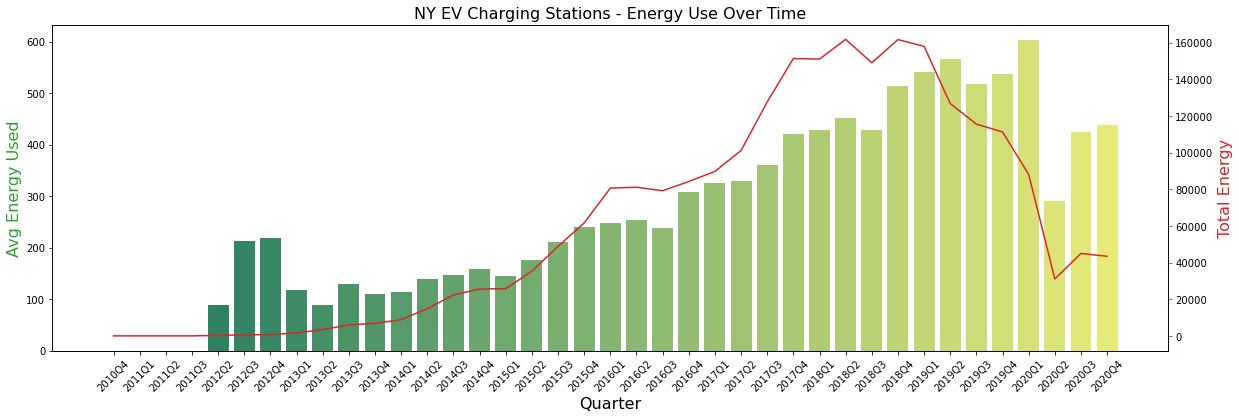

In [22]:
#Plotting the EV Charging session - Engery use over time

fig, ax1 = plt.subplots(figsize=(20,6))
color = 'tab:green'
ax1.set_title('NY EV Charging Stations - Energy Use Over Time', fontsize=16)
ax1.set_xlabel('Quarter', fontsize=16)
ax2 = sns.barplot(x='quarter', y='Avg_Energy', data = charge_session_final, palette='summer')
                  #order=charge_session_final.sort_values('Avg_Energy',ascending = True).quarter)
ax1.tick_params(axis='y')
ax1.set_ylabel('Avg Energy Used', fontsize=16, color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax1.set_xlabel('Quarter', fontsize=16)
ax2 = sns.lineplot(x='quarter', y='Total_Energy', data = charge_session_final, sort=True, color=color)
ax2.tick_params(axis='y', color=color)

ax2.set_ylabel('Total Energy', fontsize=16, color=color)
#plt.xticks(rotation=45)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
plt.show()
fig.savefig('ny_charge_energy.png')

We tried to create a twin plot (bar chart + Line chart) to show the engergy use over time and total energy used by quarter.

#### **NY EV Charging Sessions Duration**

In [23]:
#Creating dataset for EV Charging session duration
charge_sesssion_duration = charge_sesssion_duration[['quarter','Network','Charging Time (hours)','Total Duration (hours)','Charging Sessions']]

In [24]:
# Renaming the columns
charge_sesssion_duration = charge_sesssion_duration.rename(columns={'Charging Time (hours)' : 'Charging_time', 'Total Duration (hours)':'Total_Duration', 'Charging Sessions': 'Charging_Sessions'})

In [25]:
charge_sesssion_duration.head()

,quarter,Network,Charging_time,Total_Duration,Charging_Sessions
0,2019Q1,EV Connect,8,9,6
1,2019Q1,EV Connect,2,20,45
2,2019Q1,EV Connect,0,22,9
3,2019Q1,EV Connect,6,17,54
4,2019Q1,EV Connect,11,0,45


In [26]:
#Calculating Total charging time , grouping by quarter
charge_sesssion_duration['Total_Charging_Time'] = charge_sesssion_duration.groupby(['quarter'])['Charging_time'].transform('sum')

In [27]:
#Calculating Total charging sessions , grouping by quarter
charge_sesssion_duration['Total_Charging_Sessions'] = charge_sesssion_duration.groupby(['quarter'])['Charging_Sessions'].transform('sum')

In [28]:
#Dropping duplicate rows
charge_sesssion_duration = charge_sesssion_duration.drop_duplicates()

In [29]:
#Keeping only the columns needed for plotting
charge_sesssion_duration_final = charge_sesssion_duration[['quarter','Total_Charging_Time','Total_Charging_Sessions']]

In [30]:
charge_sesssion_duration_final = charge_sesssion_duration_final.drop_duplicates()

In [31]:
charge_sesssion_duration_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 5767
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   quarter                  39 non-null     period[Q-DEC]
 1   Total_Charging_Time      39 non-null     int64        
 2   Total_Charging_Sessions  39 non-null     int64        
dtypes: int64(2), period[Q-DEC](1)
memory usage: 1.2 KB


In [32]:
#Changing the datatype to string
charge_sesssion_duration_final['quarter'] = charge_sesssion_duration_final['quarter'].astype('str')

In [33]:
charge_sesssion_duration_final['q'] = charge_sesssion_duration_final['quarter'].str.replace(r'\D', '')

In [34]:
charge_sesssion_duration_final= charge_sesssion_duration_final.sort_values("q")

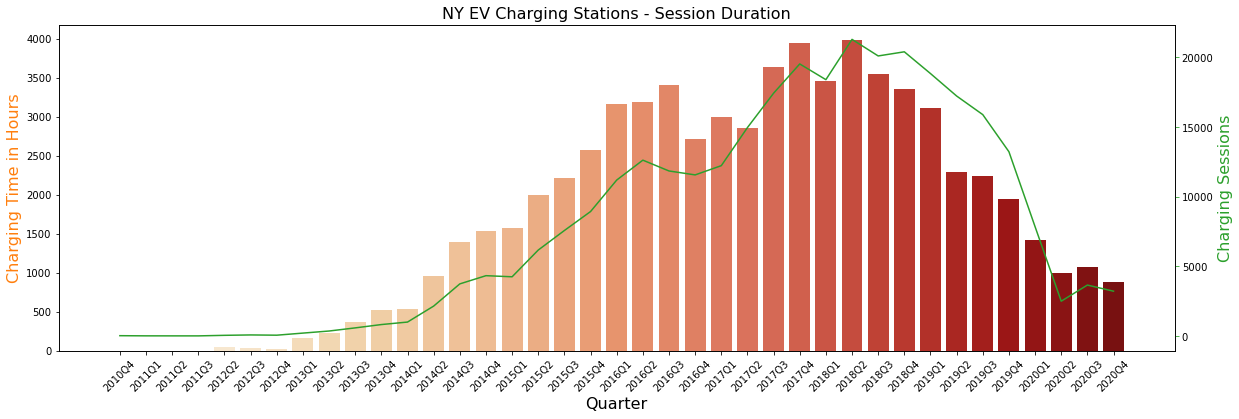

In [35]:
#Plotting the EV Charging session Duration

fig1, bx1 = plt.subplots(figsize=(20,6))
color = 'tab:orange'
bx1.set_title('NY EV Charging Stations - Session Duration', fontsize=16)
bx1.set_xlabel('Quarter', fontsize=16)
bx1 = sns.barplot(x='quarter', y='Total_Charging_Time', data = charge_sesssion_duration_final, palette='OrRd')
bx1.tick_params(axis='y')
bx1.set_ylabel('Charging Time in Hours', fontsize=16, color=color)
bx2 = bx1.twinx()
color = 'tab:green'
bx1.set_xlabel('Quarter', fontsize=16)
bx2 = sns.lineplot(x='quarter', y='Total_Charging_Sessions', data = charge_sesssion_duration_final, sort=True, color=color)
bx2.tick_params(axis='y', color=color)

bx2.set_ylabel('Charging Sessions', fontsize=16, color=color)
#plt.xticks(rotation=45)

for tick in bx1.get_xticklabels():
    tick.set_rotation(45)
    
plt.show()
fig1.savefig('ny_charge_duration.png')

At present, New York's charging capacity is limited for the nearly 15,000 electric vehicles registered in the city. About 1,400 level-2 charging plugs, which provide an 80% charge in four to eight hours, and 117 fast-charging plugs, which offer an 80% charge in 30 minutes to an hour, can be found across the city.


We analyzed at the Charging Session dataset to see the total charging hours for given charging session. The Charging duration was more before many of the DC Fast ports were installed, Recent years, with less number of session more charging is happening.

In the emerging EV charging market, time-starved consumers will likely value their time highly enough to pay a premium for speed. They’ll look for convenient locations with the fastest charging times, and they’ll be disinclined to use reservations apps. Providers targeting these consumers will build extra capacity to maximize availability and offer the fastest chargers.

Most of the public EV charging stations are opened 24/7 and they are equipped with Credit Card readers, but major network providers offer online payment, app based payment.